In [5]:
from IPython.display import display, HTML
gif_url = "https://media3.giphy.com/media/W1fFapmqgqEf8RJ9TQ/giphy.gif?cid=ecf05e470iz6g7shmt0vw4fdp7mdgf5m8c5to7jy3dv1sold&ep=v1_gifs_search&rid=giphy.gif&ct=g"
width = 700
height = 700
display(HTML(f'<img src="{gif_url}" width="{width}" height="{height}">'))

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import phik

import warnings
from IPython.display import display, HTML, Javascript
display(HTML("<style>.container { width:60% !important; }</style>"))
pd.options.display.max_columns = None
warnings.filterwarnings('ignore') 
%autosave 60

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from catboost import CatBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import random
random.seed(42)

Autosaving every 60 seconds


In [9]:
sample_submission = pd.read_csv(r"D:\Загрузки\sample_submission.csv") 

In [4]:
train = pd.read_csv(r"D:\Загрузки\train.csv") 
train_copy = train.copy()

In [5]:
test = pd.read_csv(r"D:\Загрузки\test.csv") 

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

<function matplotlib.pyplot.show(close=None, block=None)>

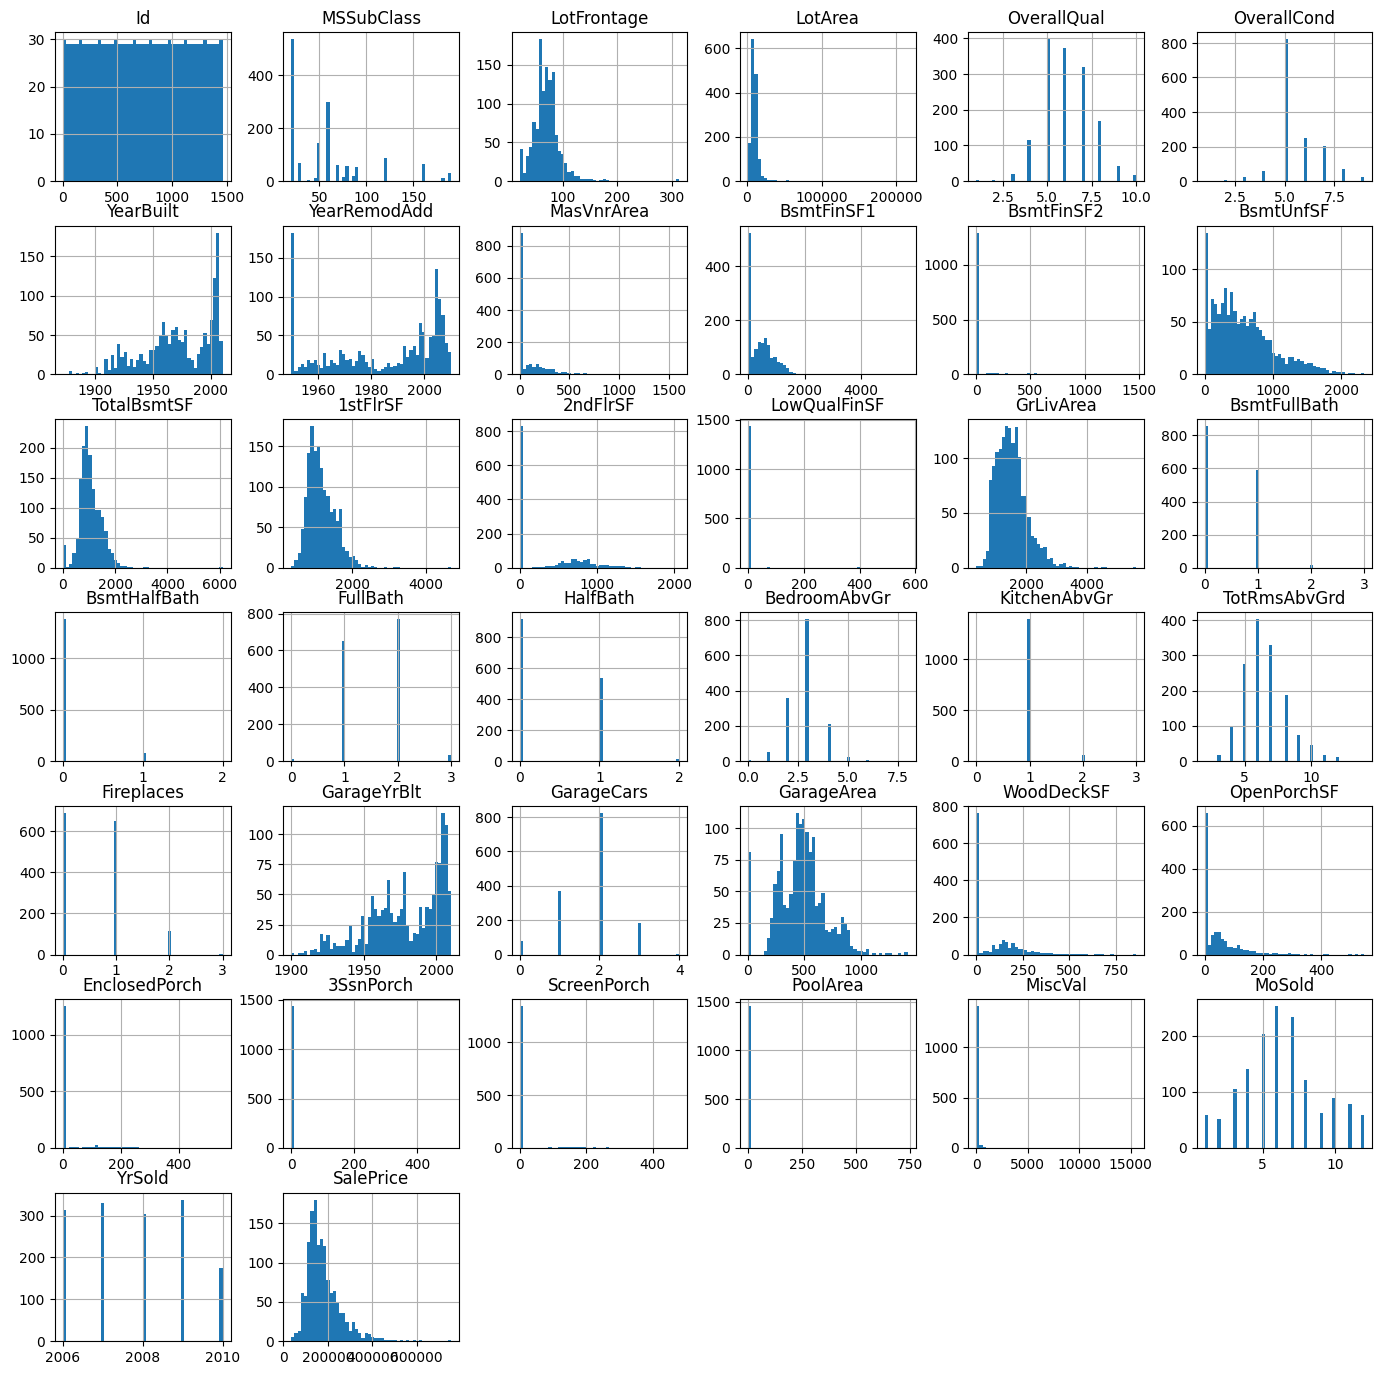

In [8]:
# распределение значений по признакам
train.hist(bins=50, figsize=(17, 17))
plt.show

In [9]:
# признаки с количеством пропусков
df_isna = []
for i in train.columns:
    if train[i].isna().sum() > 0:
        print(i, train[i].isna().sum())
        df_isna.append(i)

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [10]:
train[df_isna]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [11]:
# распределение в столбцах с пропусками
for i in train[df_isna]:
    print(i)
    print(train[i].value_counts())
    print(' ')

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
 
Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
 
MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
 
MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
 
BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
 
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
 
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
 
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
 
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19

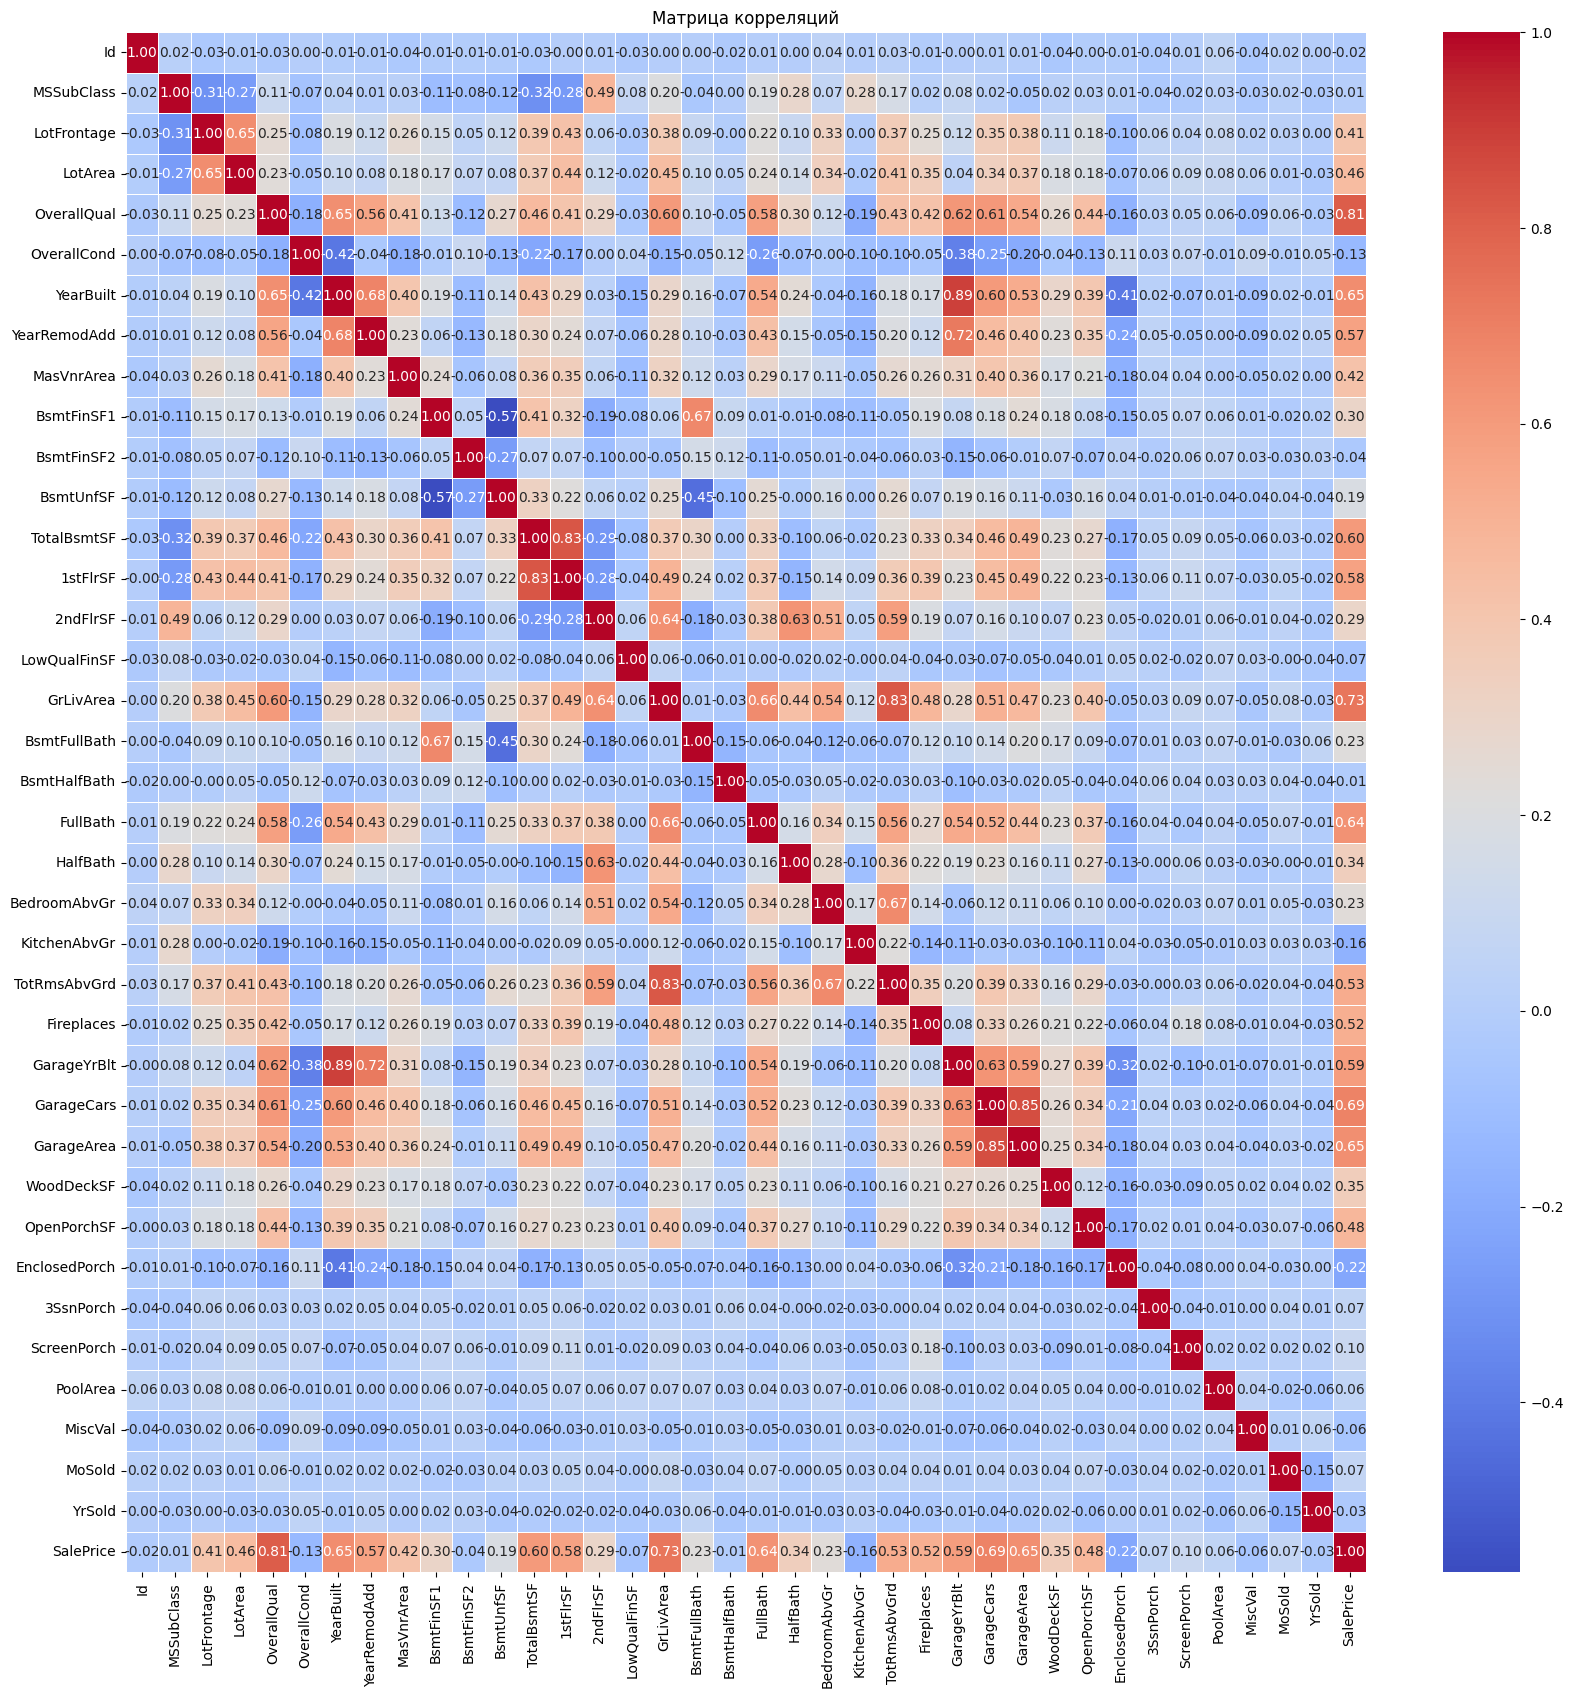

In [12]:
# матрица корреляции с коэффициентом Спирмена
numeric_columns = train.select_dtypes(include=np.number).columns
train_num = train[numeric_columns]
train_corr = train_num.corr(method='spearman')
plt.figure(figsize=(20, 20))
sns.heatmap(train_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций')
plt.show()

interval columns not set, guessing: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


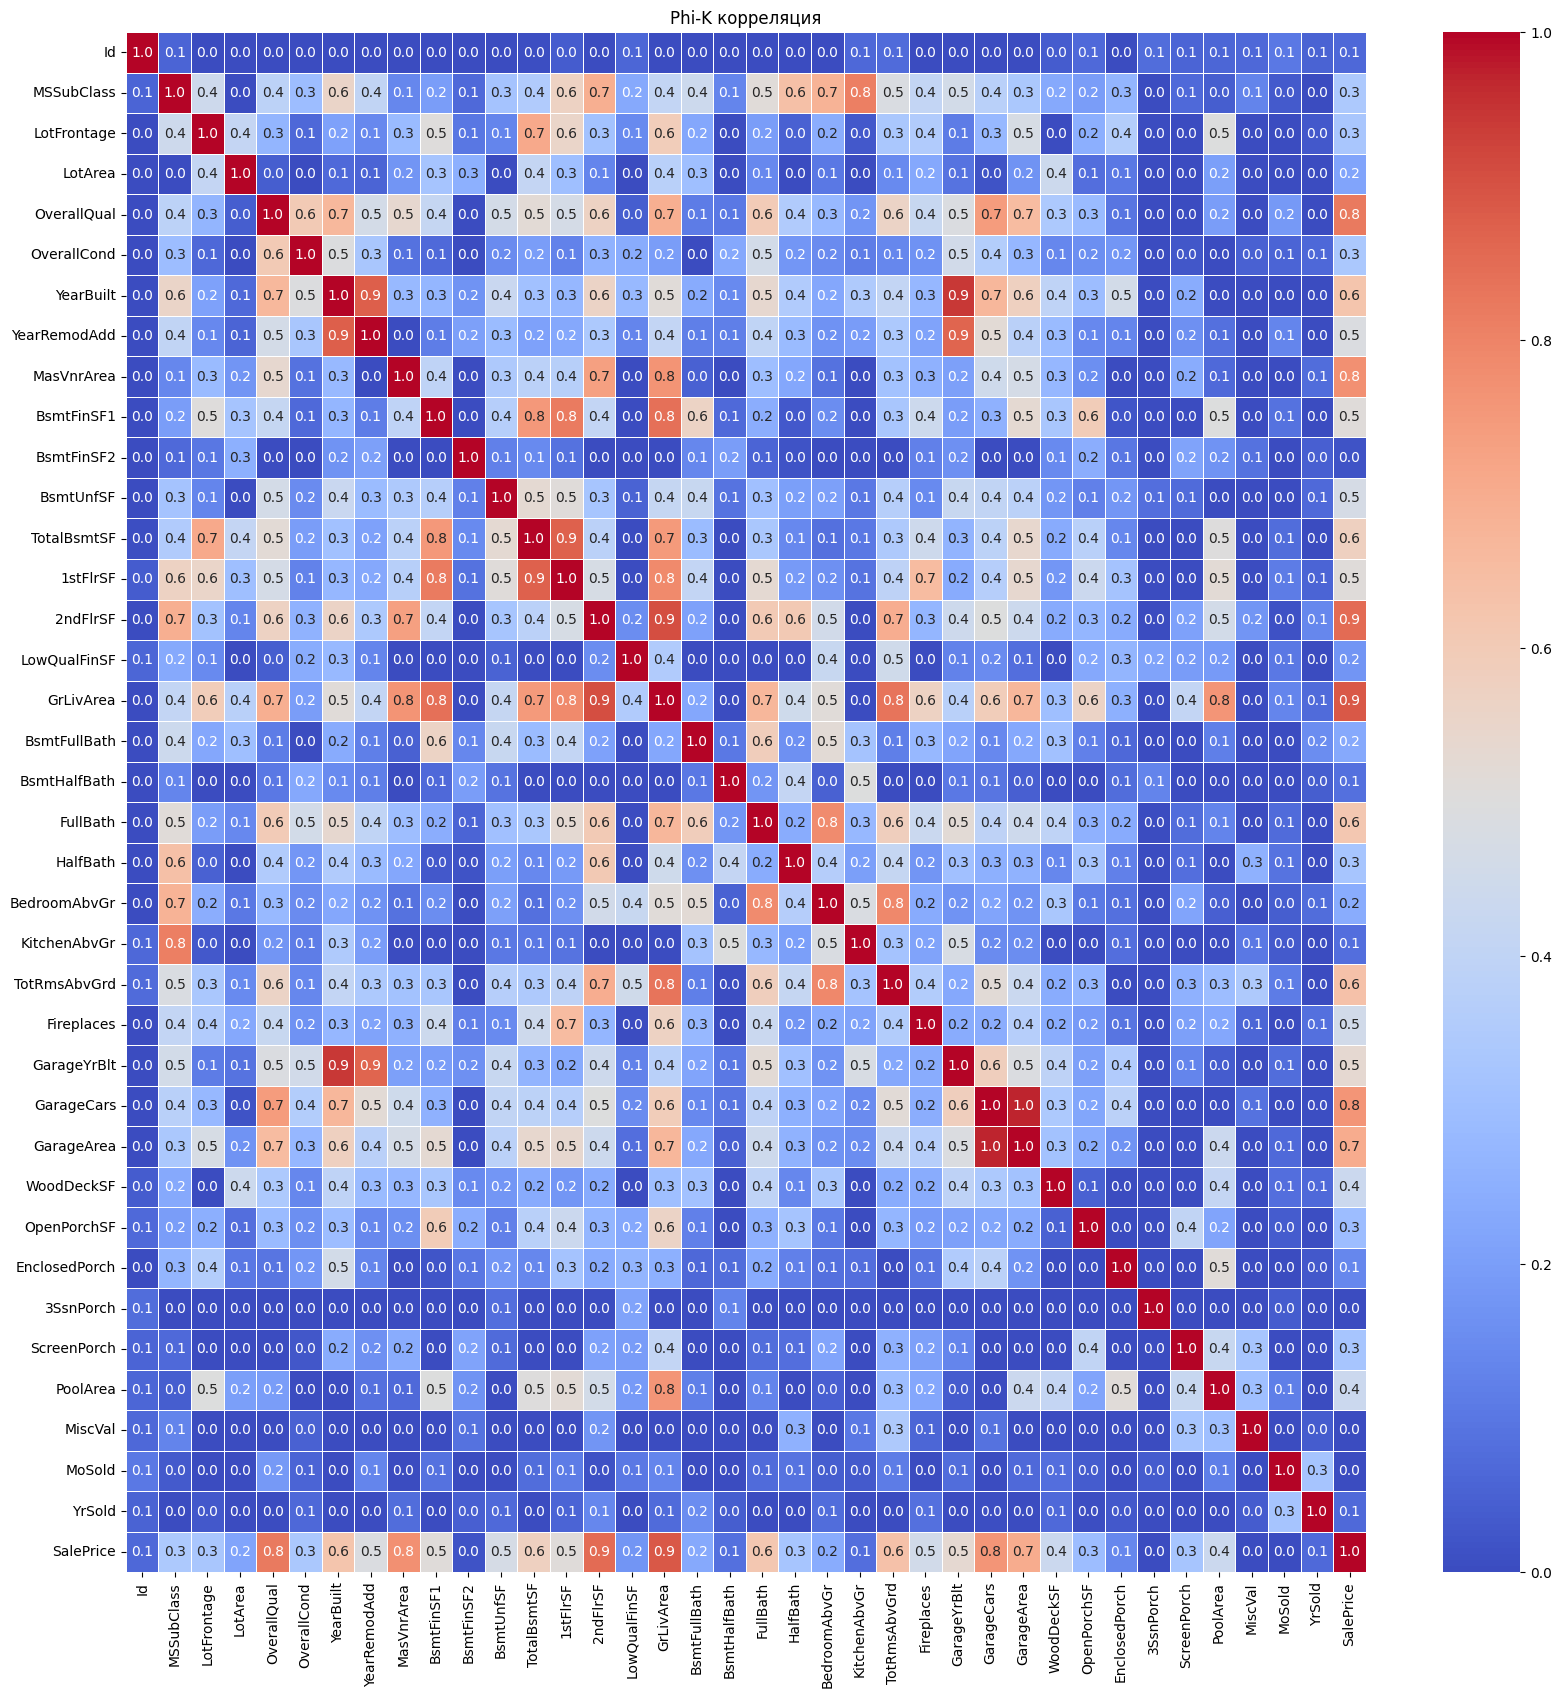

In [13]:
phi_k_corr = train_num.phik_matrix()
plt.figure(figsize=(20, 20))
sns.heatmap(phi_k_corr, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Phi-K корреляция')
plt.show()

# Обучение моделей и подбор гиперпараметров

## CatBoost

### Предобработка

In [45]:
# выделение категориальных признаков
categorical_columns = train.select_dtypes(include='object').columns

X = train.drop(columns='SalePrice')
y = train['SalePrice']

# замена пропусков в категориальных признаках на "заглушку"
X[categorical_columns] = X[categorical_columns].fillna('NA')

# разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# кодирование категориальных признаков OHE
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# стандартизация числовых признаков
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# объединяем преобразованные данные 
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, X_train.select_dtypes(include=[np.number]).columns),
                                               ('cat', categorical_transformer, categorical_columns)
                                              ]) 

In [21]:
%%time
# пайплайн обучения преобразованных данных для CatBoost
model = Pipeline(steps=[('preprocessor', preprocessor), ('forecast', CatBoostRegressor(verbose=0, n_estimators=500))])

# задаём сетку гиперпараметров для подбора и обучаем 
param_grid = {'forecast__learning_rate': [0.1, 0.01], 'forecast__depth': range(1, 11)}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=100, random_seed=42)
grid_search.fit(X_train, y_train)

# лучшие параметры и модель
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Лучшие параметры:", best_params)
print('МЕТРИКИ МОДЕЛИ "CatBoost":')
print('-------------------------')
print('MAE:', round(mean_absolute_error(y_pred, y_test), 5))
print('MAPE:', round(mean_absolute_percentage_error(y_pred, y_test), 5))
print('MSE:', round(mean_squared_error(y_pred, y_test), 5))
print('RMSE:', round(np.sqrt(mean_squared_error(y_pred, y_test))))
print('R2:', round(r2_score(y_pred, y_test), 5))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры: {'forecast__depth': 6, 'forecast__learning_rate': 0.1}
МЕТРИКИ МОДЕЛИ "CatBoost":
-------------------------
MAE: 15614.63917
MAPE: 8.41885
MSE: 742186225.04072
RMSE: 27243
R2: 0.87976
CPU times: total: 13 s
Wall time: 5min 40s


## XGBoost

In [22]:
%%time
# обучим модель с использованием XGBoost
xgboost_model = Pipeline(steps=[('preprocessor', preprocessor), ('forecast', xgb.XGBRegressor())])
xgboost_param_grid = {'forecast__learning_rate': [0.1, 0.01], 'forecast__max_depth': range(1, 11)}
xgboost_grid_search = GridSearchCV(xgboost_model, xgboost_param_grid, cv=5, scoring='neg_mean_squared_error',
                                   n_jobs=-1, verbose=100, random_state=42)
xgboost_grid_search.fit(X_train, y_train)

best_xgboost_params = xgboost_grid_search.best_params_
best_xgboost_model = xgboost_grid_search.best_estimator_

y_pred_xgboost = best_xgboost_model.predict(X_test)

print("Лучшие параметры:", best_xgboost_params)
print('МЕТРИКИ МОДЕЛИ "XGBoost":')
print('------------------------')
print('MAE:', round(mean_absolute_error(y_pred_xgboost, y_test), 5))
print('MAPE:', round(mean_absolute_percentage_error(y_pred_xgboost, y_test), 5))
print('MSE:', round(mean_squared_error(y_pred_xgboost, y_test), 5))
print('RMSE:', round(np.sqrt(mean_squared_error(y_pred_xgboost, y_test))))
print('R2:', round(r2_score(y_pred_xgboost, y_test), 5))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры: {'forecast__learning_rate': 0.1, 'forecast__max_depth': 3}
МЕТРИКИ МОДЕЛИ "XGBoost":
------------------------
MAE: 16965.48776
MAPE: 9.37109
MSE: 836026007.7262
RMSE: 28914
R2: 0.85993
CPU times: total: 1.75 s
Wall time: 9.73 s


## SKlearn - GradientBoostingRegressor

### Предобработка

In [33]:
# выделение категориальных и числовых признаков в списки
categorical_columns = train.select_dtypes(include='object').columns
numeric_columns = train.select_dtypes(include=np.number).columns

# заполняем пропуски числовых признаков на среднее
imputer = SimpleImputer(strategy='mean')  
train[numeric_columns] = imputer.fit_transform(train[numeric_columns])

# выделяем целевую переменную
X = train.drop(columns='SalePrice')
y = train['SalePrice']

# замена пропусков в категориальных признаках на "заглушку"
X[categorical_columns] = X[categorical_columns].fillna('NA')

# разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# кодирование категориальных признаков OHE
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# стандартизация числовых признаков
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# объединяем преобразованные данные 
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, X_train.select_dtypes(include=[np.number]).columns),
                                               ('cat', categorical_transformer, categorical_columns)
                                              ]) 

In [34]:
%%time
# обучим модель с использованием Градиентного бустинга
gradientboosting_model = Pipeline(steps=[('preprocessor', preprocessor), ('forecast', GradientBoostingRegressor())])
gradientboosting_param_grid = {'forecast__n_estimators': [100, 300, 500], 'forecast__max_depth':range(1, 11)}
gradientboosting_grid_search = GridSearchCV(gradientboosting_model, gradientboosting_param_grid, cv=5,
                                            scoring='neg_mean_squared_error', n_jobs=-1, verbose=100, random_state=42)
gradientboosting_grid_search.fit(X_train, y_train)

best_gradientboosting_params = gradientboosting_grid_search.best_params_
best_gradientboosting_model =gradientboosting_grid_search.best_estimator_

y_pred_gradientboosting = best_gradientboosting_model.predict(X_test)

print("Лучшие параметры:", best_gradientboosting_params)
print('МЕТРИКИ МОДЕЛИ "ГРАДИЕНТНОГО БУСТИНГА":')
print('--------------------------------------')
print('MAE:', round(mean_absolute_error(y_pred_gradientboosting, y_test), 5))
print('MAPE:', round(mean_absolute_percentage_error(y_pred_gradientboosting, y_test), 5))
print('MSE:', round(mean_squared_error(y_pred_gradientboosting, y_test), 5))
print('RMSE:', round(np.sqrt(mean_squared_error(y_pred_gradientboosting, y_test))))
print('R2:', round(r2_score(y_pred_gradientboosting, y_test), 5))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Лучшие параметры: {'forecast__max_depth': 2, 'forecast__n_estimators': 500}
МЕТРИКИ МОДЕЛИ "ГРАДИЕНТНОГО БУСТИНГА":
--------------------------------------
MAE: 16884.2957
MAPE: 9.29941
MSE: 861745628.19709
RMSE: 29356
R2: 0.86476
CPU times: total: 4.44 s
Wall time: 4min 7s


## SKlearn - RandomForestRegressor

In [35]:
%%time
# обучим модель с использованием Случайного леса на предобработанных данных
random_forest_model = Pipeline(steps=[('preprocessor', preprocessor), ('forecast', RandomForestRegressor())])

random_forest_param_grid = {'forecast__n_estimators': [100, 300, 500], 'forecast__max_depth': range(1, 11)}
random_forest_grid_search = GridSearchCV(random_forest_model, random_forest_param_grid, cv=5,
                                         scoring='neg_mean_squared_error', n_jobs=-1, verbose=100, random_state=42)
random_forest_grid_search.fit(X_train, y_train)

best_random_forest_params = random_forest_grid_search.best_params_
best_random_forest_model = random_forest_grid_search.best_estimator_

y_pred_random_forest = best_random_forest_model.predict(X_test)

print("Лучшие параметры:", best_random_forest_params)
print('МЕТРИКИ МОДЕЛИ "СЛУЧАЙНОГО ЛЕСА":')
print('--------------------------------')
print('MAE:', round(mean_absolute_error(y_pred_random_forest, y_test), 5))
print('MAPE:', round(mean_absolute_percentage_error(y_pred_random_forest, y_test), 5))
print('MSE:', round(mean_squared_error(y_pred_random_forest, y_test), 5))
print('RMSE:', round(np.sqrt(mean_squared_error(y_pred_random_forest, y_test))))
print('R2:', round(r2_score(y_pred_random_forest, y_test), 5))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Лучшие параметры: {'forecast__max_depth': 10, 'forecast__n_estimators': 500}
МЕТРИКИ МОДЕЛИ "СЛУЧАЙНОГО ЛЕСА":
--------------------------------
MAE: 17785.75455
MAPE: 9.8298
MSE: 860575342.62658
RMSE: 29336
R2: 0.84021
CPU times: total: 42.2 s
Wall time: 4min 45s


# Прогноз на контрольной выборке

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Предобработка данных, обучение модели CatBoost с лучшими гиперпараметрами и анализ работы алгоритма

In [48]:
categorical_columns = train_copy.select_dtypes(include='object').columns
X = train_copy.drop(columns='SalePrice')
y = train_copy['SalePrice']
X[categorical_columns] = X[categorical_columns].fillna('NA')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, X_train.select_dtypes(include=[np.number]).columns),
                                               ('cat', categorical_transformer, categorical_columns)]) 
catboost_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('forecast', CatBoostRegressor(verbose=100,
                                                                     n_estimators=500,
                                                                     learning_rate=0.1,
                                                                     depth=5,
                                                                     random_state=42))])
catboost_model.fit(X_train, y_train)

catboost_model_pred = catboost_model.predict(X_test)

print('МЕТРИКИ МОДЕЛИ "CatBoost":')
print('-------------------------')
print('MAE:', round(mean_absolute_error(catboost_model_pred, y_test), 5))
print('MAPE:', round(mean_absolute_percentage_error(catboost_model_pred, y_test), 5))
print('MSE:', round(mean_squared_error(catboost_model_pred, y_test), 5))
print('RMSE:', round(np.sqrt(mean_squared_error(catboost_model_pred, y_test))))
print('R2:', round(r2_score(catboost_model_pred, y_test), 5))

0:	learn: 72354.7572631	total: 3.4ms	remaining: 1.69s
100:	learn: 16616.1681885	total: 283ms	remaining: 1.12s
200:	learn: 11934.8700884	total: 570ms	remaining: 847ms
300:	learn: 9327.6554775	total: 893ms	remaining: 590ms
400:	learn: 7537.5813526	total: 1.18s	remaining: 291ms
499:	learn: 6182.0513140	total: 1.46s	remaining: 0us
МЕТРИКИ МОДЕЛИ "CatBoost":
-------------------------
MAE: 15609.87
MAPE: 8.63558
MSE: 648078931.88405
RMSE: 25457
R2: 0.89359


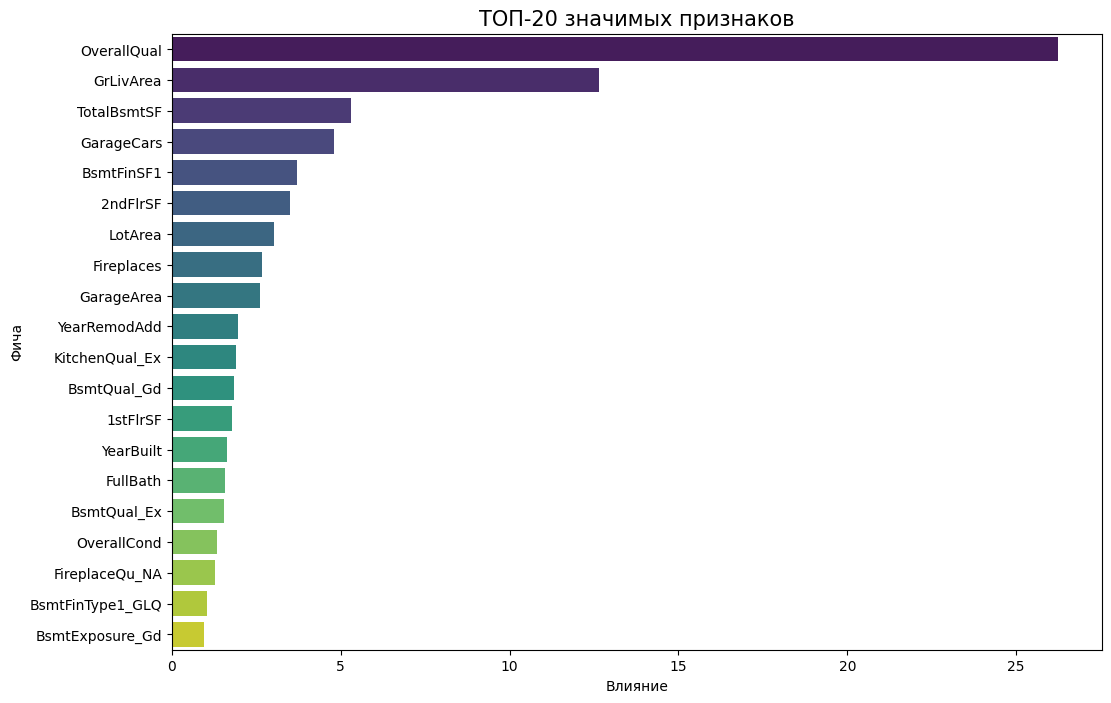

In [61]:
# визуализация значимости фичей
feature_importance = catboost_model.named_steps['forecast'].get_feature_importance()
feature_names = (catboost_model.named_steps['preprocessor'].transformers_[1][1].
                 named_steps['onehot'].get_feature_names_out(input_features=categorical_columns))
feature_names = np.concatenate([X_train.select_dtypes(include=[np.number]).columns, feature_names])

# формируем датафрейм с ТОП-20 важных признаков
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted, palette='viridis')
plt.xlabel('Влияние')
plt.ylabel('Фича')
plt.title('ТОП-20 значимых признаков', fontsize=15)
plt.show()

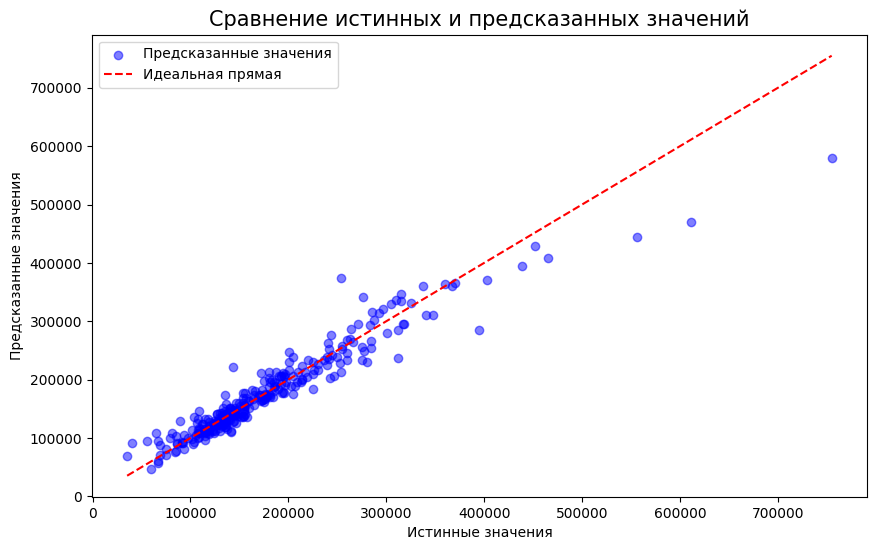

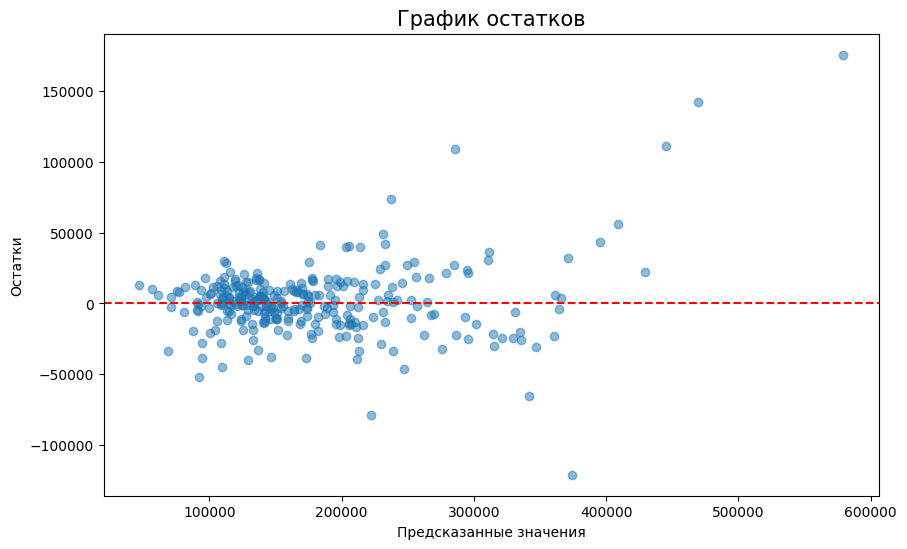

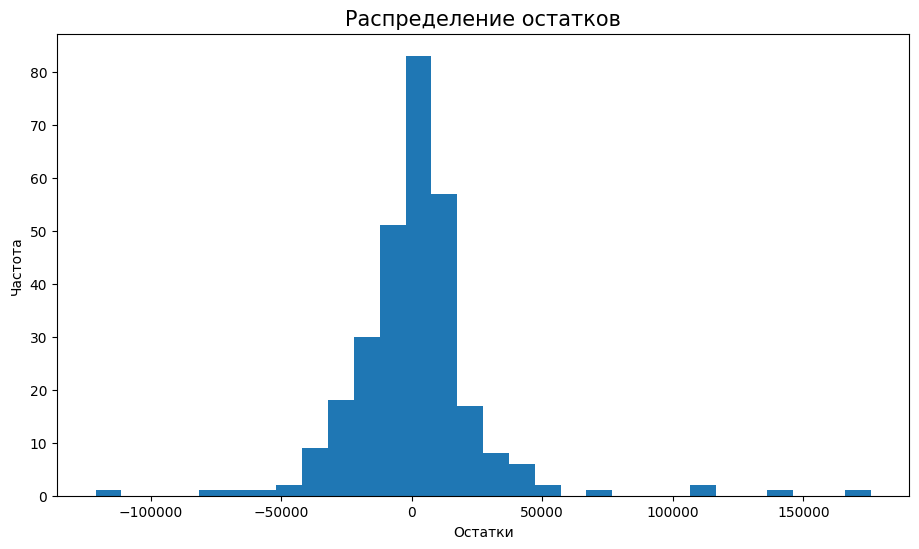

In [64]:
# визуализация истинных и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, catboost_model_pred, alpha=0.5, color='b', label='Предсказанные значения')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', label='Идеальная прямая')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений', fontsize=15)
plt.legend()
plt.show()
plt.clf()

# остатки
residuals = y_test - catboost_model_pred

# график остатков
plt.figure(figsize=(10, 6))
plt.scatter(catboost_model_pred, residuals, alpha=0.5)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('График остатков', fontsize=15)
plt.show()
plt.clf()

# гистограмма остатков
plt.figure(figsize=(11, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Распределение остатков', fontsize=15)
plt.show()

### Контрольный прогноз

In [49]:
# выделение категориальных признаков
categorical_columns = test.select_dtypes(include='object').columns

X = test

# замена пропусков в категориальных признаках на "заглушку"
X[categorical_columns] = X[categorical_columns].fillna('NA')

# кодирование категориальных признаков OHE
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# стандартизация числовых признаков
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# объединяем преобразованные данные 
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, X.select_dtypes(include=[np.number]).columns),
                                               ('cat', categorical_transformer, categorical_columns)
                                              ]) 

test['predict'] = catboost_model.predict(X)

result = test[['Id', 'predict']]
result

,Id,predict
0,1461,127829.043961
1,1462,163031.402160
2,1463,186855.754680
3,1464,188421.122374
4,1465,185969.134379
...,...,...
1454,2915,75737.707637
1455,2916,78480.516315
1456,2917,175459.138696
1457,2918,115988.578296


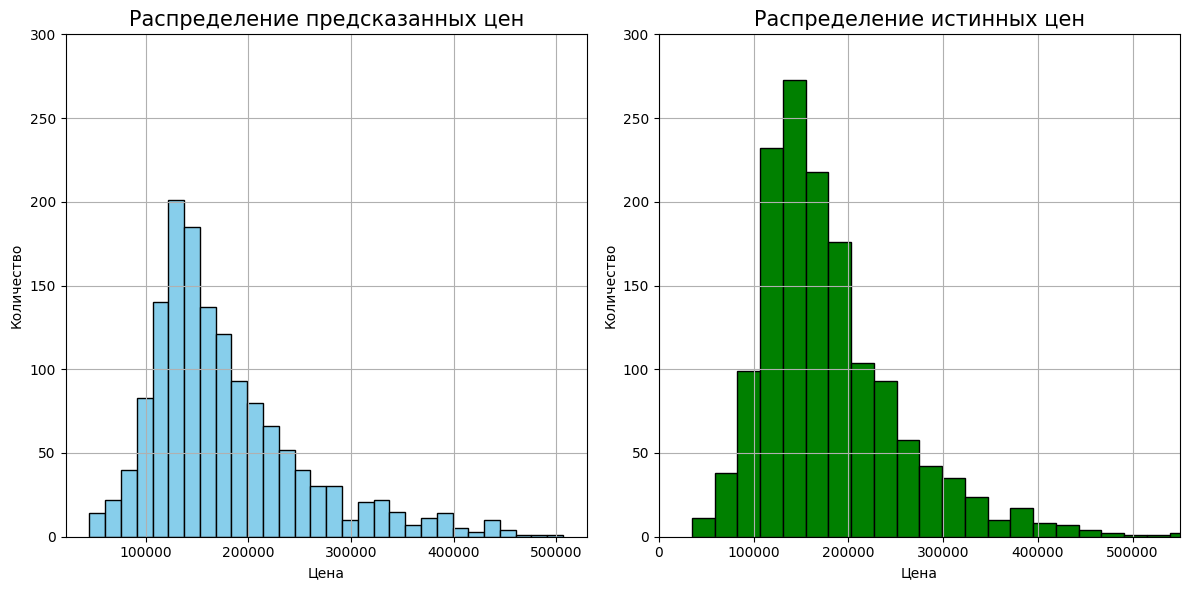

In [89]:
# распределение предсказанных значений
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
result['predict'].hist(bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.title('Распределение предсказанных цен', fontsize=15)
plt.ylim(0, 300)  

# распределение истинных значений
plt.subplot(1, 2, 2)
train['SalePrice'].hist(bins=30, edgecolor='black', color='green')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.title('Распределение истинных цен', fontsize=15)
plt.xlim(0, 550000)
plt.ylim(0, 300)  

plt.tight_layout()  
plt.show()